In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Генернируем данные

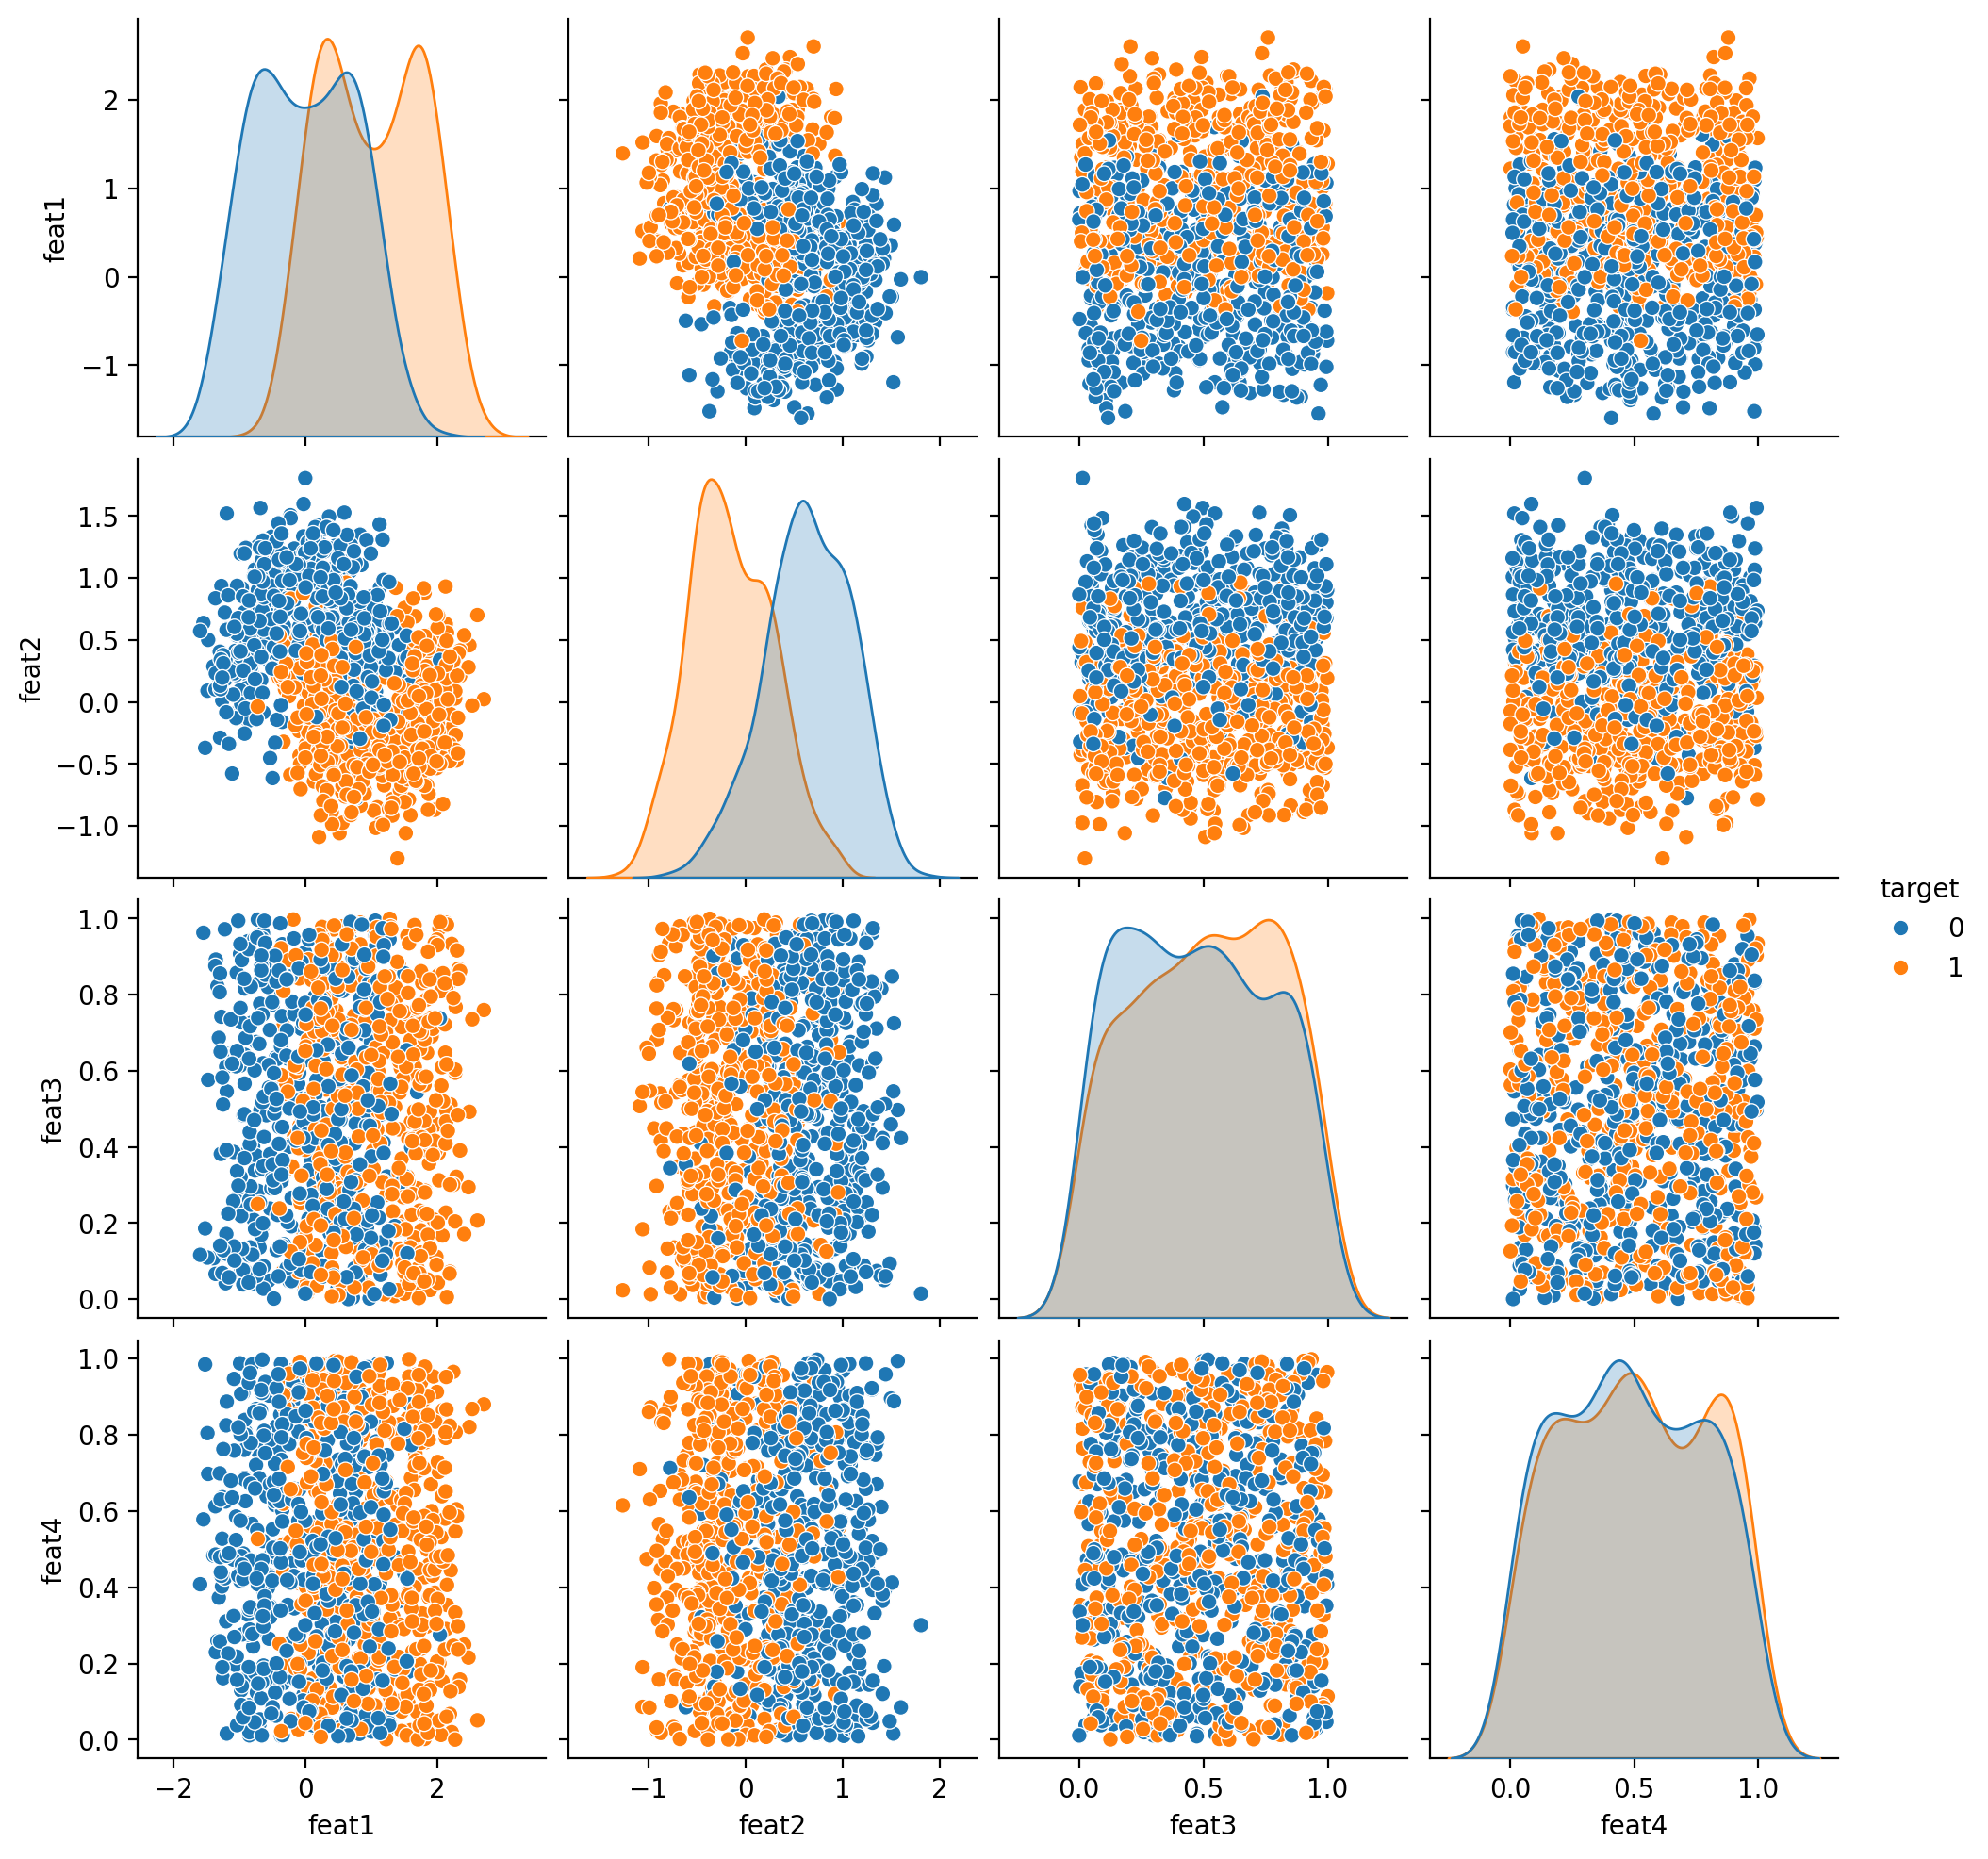

In [2]:
X, y = make_moons(n_samples=1_000, random_state=0, noise=0.3)

df = pd.DataFrame({
    'feat1': X[:, 0],
    'feat2': X[:, 1],
    'feat3': np.random.rand(X.shape[0]),
    'feat4': np.random.rand(X.shape[0]),
    'target': y
})

sns.pairplot(df, hue='target')

## Сравнение доступных алгоритмов

In [3]:
from pycaret.classification import setup, compare_models, tune_model, evaluate_model, create_model
from dask.distributed import Client
from pycaret.parallel import FugueBackend

In [4]:
s = setup(
  data=df, 
  target='target',
  n_jobs=1
)

,Description,Value
0,Session id,929
1,Target,target
2,Target type,Binary
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(700, 5)"
6,Transformed test set shape,"(300, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [5]:
dask_client = Client()

In [6]:
%%time
best = compare_models(
  parallel=FugueBackend('dask')  
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9143,0.9618,0.9143,0.9159,0.9142,0.8286,0.8302,0.071
et,Extra Trees Classifier,0.9129,0.9676,0.9229,0.9058,0.9135,0.8257,0.8274,0.050
gbc,Gradient Boosting Classifier,0.9100,0.9634,0.9143,0.9095,0.9104,0.8200,0.8226,0.066
ada,Ada Boost Classifier,0.9086,0.9649,0.9114,0.9083,0.9090,0.8171,0.8186,0.038
knn,K Neighbors Classifier,0.9071,0.9516,0.9086,0.9080,0.9073,0.8143,0.8160,0.009
lightgbm,Light Gradient Boosting Machine,0.9043,0.9607,0.9086,0.9026,0.9043,0.8086,0.8108,0.037
dt,Decision Tree Classifier,0.8929,0.8929,0.8857,0.9016,0.8917,0.7857,0.7890,0.015
nb,Naive Bayes,0.8429,0.9362,0.8371,0.8473,0.8411,0.6857,0.6874,0.007
qda,Quadratic Discriminant Analysis,0.8429,0.9380,0.8400,0.8460,0.8420,0.6857,0.6873,0.006
lr,Logistic Regression,0.8414,0.9375,0.8371,0.8449,0.8401,0.6829,0.6843,0.007


CPU times: user 130 ms, sys: 13.3 ms, total: 144 ms
Wall time: 6.71 s


In [7]:
dask_client

<Client: 'tcp://172.21.0.5:8786' processes=3 threads=24, memory=6.00 GiB>